In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, f1_score

This Code is inspired by geeks for geeks

Loading train Data

In [ ]:
traindata = "Traindata.csv"
data = pd.read_csv(traindata).dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
	"Disease": disease_counts.index,
	"Counts": disease_counts.values
})
# Encoding the target value into numerical
# value using LabelEncoder
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

Converting into numerical format using Encoding

In [ ]:
encode = LabelEncoder()
encoded_prognosis = encode.fit_transform(data["prognosis"])
data["prognosis"] = encoded_prognosis
data

Splitting the dataset

In [ ]:
# Splitting the dataset into input features (X) and target variable (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24)

# Displaying the shapes of the training and testing sets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (3936, 132) (3936,)
Testing data shape: (984, 132) (984,)


Cross Validation on models

In [ ]:
def custom_accuracy(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "Support Vector Classifier (SVC)": SVC(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest Classifier": RandomForestClassifier(random_state=18)
}

# Evaluating Models using Cross Validation
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1, scoring=custom_accuracy)
    print("=" * 60)
    print(f"Model: {model_name}")
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")


Model: Support Vector Classifier (SVC)
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Model: Gaussian Naive Bayes
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Model: Random Forest Classifier
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Data Training

In [ ]:
SVM = SVC()
SVM.fit(X_train, y_train)
preds = SVM.predict(X_test)

print(f"Accuracy on train data by SVM Classifier: {accuracy_score(y_train, SVM.predict(X_train))*100}")
print(f"Accuracy on test data by SVM Classifier: {accuracy_score(y_test, preds)*100}")
print(f"Precision score on test data by SVM Classifier: {precision_score(y_test, preds, average='weighted')*100}")
print(f"Recall score on test data by SVM Classifier: {recall_score(y_test, preds, average='weighted')*100}")
print(f"F1-score on test data by SVM Classifier: {f1_score(y_test, preds, average='weighted')*100}")
GNB = GaussianNB()
GNB.fit(X_train, y_train)
preds = GNB.predict(X_test)

print(f"Accuracy on train data by Naive Bayes Classifier: {accuracy_score(y_train, GNB.predict(X_train))*100}")
print(f"Accuracy on test data by Naive Bayes Classifier: {accuracy_score(y_test, preds)*100}")
print(f"Precision score on test data by Naive Bayes Classifier: {precision_score(y_test, preds, average='weighted')*100}")
print(f"Recall score on test data by Naive Bayes Classifier: {recall_score(y_test, preds, average='weighted')*100}")
print(f"F1-score on test data by Naive Bayes Classifier: {f1_score(y_test, preds, average='weighted')*100}")
RFC = RandomForestClassifier(random_state=18)
RFC.fit(X_train, y_train)
preds = RFC.predict(X_test)

print(f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train, RFC.predict(X_train))*100}")
print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, preds)*100}")
print(f"Precision score on test data by Random Forest Classifier: {precision_score(y_test, preds, average='weighted')*100}")
print(f"Recall score on test data by Random Forest Classifier: {recall_score(y_test, preds, average='weighted')*100}")
print(f"F1-score on test data by Random Forest Classifier: {f1_score(y_test, preds, average='weighted')*100}")



Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0
Precision score on test data by SVM Classifier: 100.0
Recall score on test data by SVM Classifier: 100.0
F1-score on test data by SVM Classifier: 100.0
Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0
Precision score on test data by Naive Bayes Classifier: 100.0
Recall score on test data by Naive Bayes Classifier: 100.0
F1-score on test data by Naive Bayes Classifier: 100.0
Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0
Precision score on test data by Random Forest Classifier: 100.0
Recall score on test data by Random Forest Classifier: 100.0
F1-score on test data by Random Forest Classifier: 100.0


Prediction on test data

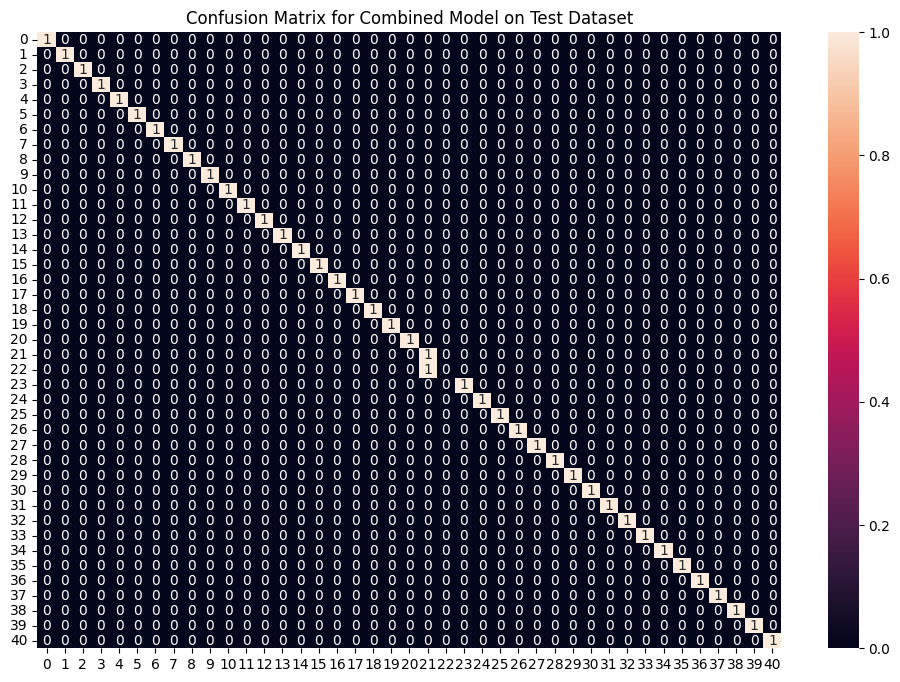

Accuracy on Test dataset by the rf_preds: 97.5609756097561
Precision score on test data by Random Forest Classifier: 96.34146341463415
Recall score on test data by Random Forest Classifier: 97.5609756097561
F1-score on test data by Random Forest Classifier: 96.74796747967478
Accuracy on Test dataset by the nb_preds: 97.5609756097561
Precision score on test data by Naive Bayes Classifier: 96.34146341463415
Recall score on test data by Naive Bayes Classifier: 97.5609756097561
F1-score on test data by Naive Bayes Classifier: 96.74796747967478
Accuracy on Test dataset by the svm_preds: 97.5609756097561
Precision score on test data by SVM Classifier: 96.34146341463415
Recall score on test data by SVM Classifier: 97.5609756097561
F1-score on test data by SVM Classifier: 96.74796747967478
Accuracy on Test dataset by the combined model: 97.5609756097561


In [ ]:
final_SVM = SVC()
final_GNB = GaussianNB()
final_RFC = RandomForestClassifier(random_state=18)

final_SVM.fit(X, y)
final_GNB.fit(X, y)
final_RFC.fit(X, y)

# Reading the test data
testdata = pd.read_csv("Testdata.csv").dropna(axis=1)

test_X = testdata.iloc[:, :-1]
test_Y = encode.transform(testdata.iloc[:, -1])

# Making predictions by taking the mode of predictions
# made by all the classifiers
svm_prediction = final_SVM.predict(test_X)
nb_prediction = final_GNB.predict(test_X)
rf_prediction = final_RFC.predict(test_X)

accuracy_rf = accuracy_score(test_Y, rf_prediction) * 100
precision_rf = precision_score(test_Y, rf_prediction, average='weighted') * 100
recall_rf = recall_score(test_Y, rf_prediction, average='weighted') * 100
f1_rf = f1_score(test_Y, rf_prediction, average='weighted') * 100

accuracy_nb = accuracy_score(test_Y, nb_prediction) * 100
precision_nb = precision_score(test_Y, nb_prediction, average='weighted') * 100
recall_nb = recall_score(test_Y, nb_prediction, average='weighted') * 100
f1_nb = f1_score(test_Y, nb_prediction, average='weighted') * 100

accuracy_svm = accuracy_score(test_Y, svm_prediction) * 100
precision_svm = precision_score(test_Y, svm_prediction, average='weighted') * 100
recall_svm = recall_score(test_Y, svm_prediction, average='weighted') * 100
f1_svm = f1_score(test_Y, svm_prediction, average='weighted') * 100

final_prediction = [mode([i, j, k])[0][0] for i, j, k in zip(svm_prediction, nb_prediction, rf_prediction)]
accuracy_combined = accuracy_score(test_Y, final_prediction) * 100

cf_matrix = confusion_matrix(test_Y, final_prediction)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

print(f"Accuracy on Test dataset by the rf_preds: {accuracy_rf}")
print(f"Precision score on test data by Random Forest Classifier: {precision_rf}")
print(f"Recall score on test data by Random Forest Classifier: {recall_rf}")
print(f"F1-score on test data by Random Forest Classifier: {f1_rf}")

print(f"Accuracy on Test dataset by the nb_preds: {accuracy_nb}")
print(f"Precision score on test data by Naive Bayes Classifier: {precision_nb}")
print(f"Recall score on test data by Naive Bayes Classifier: {recall_nb}")
print(f"F1-score on test data by Naive Bayes Classifier: {f1_nb}")

print(f"Accuracy on Test dataset by the svm_preds: {accuracy_svm}")
print(f"Precision score on test data by SVM Classifier: {precision_svm}")
print(f"Recall score on test data by SVM Classifier: {recall_svm}")
print(f"F1-score on test data by SVM Classifier: {f1_svm}")

print(f"Accuracy on Test dataset by the combined model: {accuracy_combined}")


In [ ]:
# Extracting symptom columns
symptoms = X.columns.values
# Creating a dictionary to map symptoms to their corresponding numerical indices
symptom_index = {}
for index, value in enumerate(symptoms):
    formatted_symptom = " ".join([j.capitalize() for j in value.split("_")])
    symptom_index[formatted_symptom] = index

# Creating a dictionary to store symptom indices and model prediction classes
data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encode.classes_
}

# Defining a function for disease prediction
def predict_disease(symptoms_input):
    input_symptoms = symptoms_input.split(",")

    # Creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in input_symptoms:
        index = data_dict["symptom_index"].get(symptom)
        if index is not None:
            input_data[index] = 1

    input_data = np.array(input_data).reshape(1, -1)

    # Generating individual predictions
    final_RFC_prediction = data_dict["predictions_classes"][final_RFC.predict(input_data)[0]]
    final_GNB_prediction = data_dict["predictions_classes"][final_GNB.predict(input_data)[0]]
    final_SVM_prediction = data_dict["predictions_classes"][final_SVM.predict(input_data)[0]]

    # Making the final prediction by taking the mode of individual predictions
    Final_Prediction = mode([final_RFC_prediction, final_GNB_prediction, final_SVM_prediction])[0][0]
    predictions = {
        "rf_model_prediction": final_RFC_prediction,
        "naive_bayes_prediction": final_GNB_prediction,
        "svm_model_prediction": final_SVM_prediction,
        "final_prediction": Final_Prediction
    }
    return predictions

# Testing the function with a sample set of symptoms
sample_symptoms = "High Fever,Chills,Headache,Muscle Pain,Yellowish Skin,Throat Irritation,Cough"
sample_predictions = predict_disease(sample_symptoms)
print(sample_predictions)


In [ ]:
import joblib
joblib.dump(final_SVM, 'model.pkl')
print("Model dumped!")

# Load the model that you just saved
lr = joblib.load('model.pkl')

# Saving the data columns from training
# model_columns = list(x.columns)
# joblib.dump(model_columns, 'model_columns.pkl')
# print("Models columns dumped!")

In [ ]:
pred2=predict_disease("Stomach Pain,Red Sore Around Nose,Spotting Urination")
print(pred2)

In [ ]:
!pip install flask-ngrok
!pip install pyngrok==4.1.1
!ngrok authtoken 2SJDmaEzO6kHR6zu65MenDUY9az_oVVxoNVc3FCr1mvrPPho

In [ ]:

import json
from flask import Flask, request, jsonify
app = Flask(__name__)
run_with_ngrok(app)

@app.route("/",methods=['POST'])
def home():
 data = request.form.get('symtoms')
 pred2=predict_disease(data)
 return pred2

app.run()

In [1]:
import re
import requests
from bs4 import BeautifulSoup
from googlesearch import search
import warnings

warnings.filterwarnings("ignore")

def clean_text(text):
    text = text.replace('.','')
    text = text.replace(';',',')
    text = text.replace('<b>','<b> \n')
    text = re.sub(r'<a.*?>', '', text)  # Remove hyperlink
    text = re.sub(r'</a>', '', text)  # Remove hyperlink
    text = re.sub(r'<[^<]+?>', ' ', text)  # All the tags
    text = re.sub(r'\[.*\]', '', text)  # Remove citation text
    text = text.replace("&gt", ">")
    return text

def get_disease_detail(term):
    diseases = [term]
    ret = term + "\n"

    for dis in diseases:
        query = dis + ' wikipedia'

        for sr in search(query, tld="co.in", stop=10, pause=0.5):
            match = re.search(r'wikipedia', sr)
            filled = 0

            if match:
                wiki = requests.get(sr, verify=False)
                soup = BeautifulSoup(wiki.content, 'html5lib')
                info_table = soup.find("table", {"class": "infobox"})

                if info_table is not None:
                    for row in info_table.find_all("tr"):
                        data = row.find("th", {"scope": "row"})

                        if data is not None:
                            symptom = str(row.find("td"))
                            symptom = clean_text(symptom)
                            ret += data.get_text() + " - " + symptom + "\n"
                            filled = 1

                if filled:
                    break

    return ret


In [3]:
print(get_disease_detail("fever"))

fever
Other names -  Pyrexia, febrile response, febrile   
Specialty -  Infectious disease, pediatrics 
Symptoms -    
Initially : shivering, feeling cold, chills     
Later : flushed, sweating   
Complications -  Febrile seizure   
Causes -  Virus, bacteria, increase in the body's temperature set point   
Diagnostic method -  Temperature >, between 372 and 448 °C (990 and 1126 °F)   
Differential diagnosis -  Hyperthermia   
Treatment -  Based on underlying cause, not required for fever itself   
Medication -  Ibuprofen, paracetamol (acetaminophen)   
Frequency -  Common   

